**Graduate Admissions Dataset**

This dataset is created by **Mohan S Acharya** to estimate chances of graduate admission. Our analysis will help us in understand what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.


**Importing libraries**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Reading data from csv**

In [16]:
admission = pd.read_csv('Admission_Predict_Ver1.1.csv')
admission.drop('Serial No.', inplace = True, axis = 1)

In [17]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [18]:
print(admission.columns)
admission.head()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Exploratory Data Analysis**

Some plots to check out the data

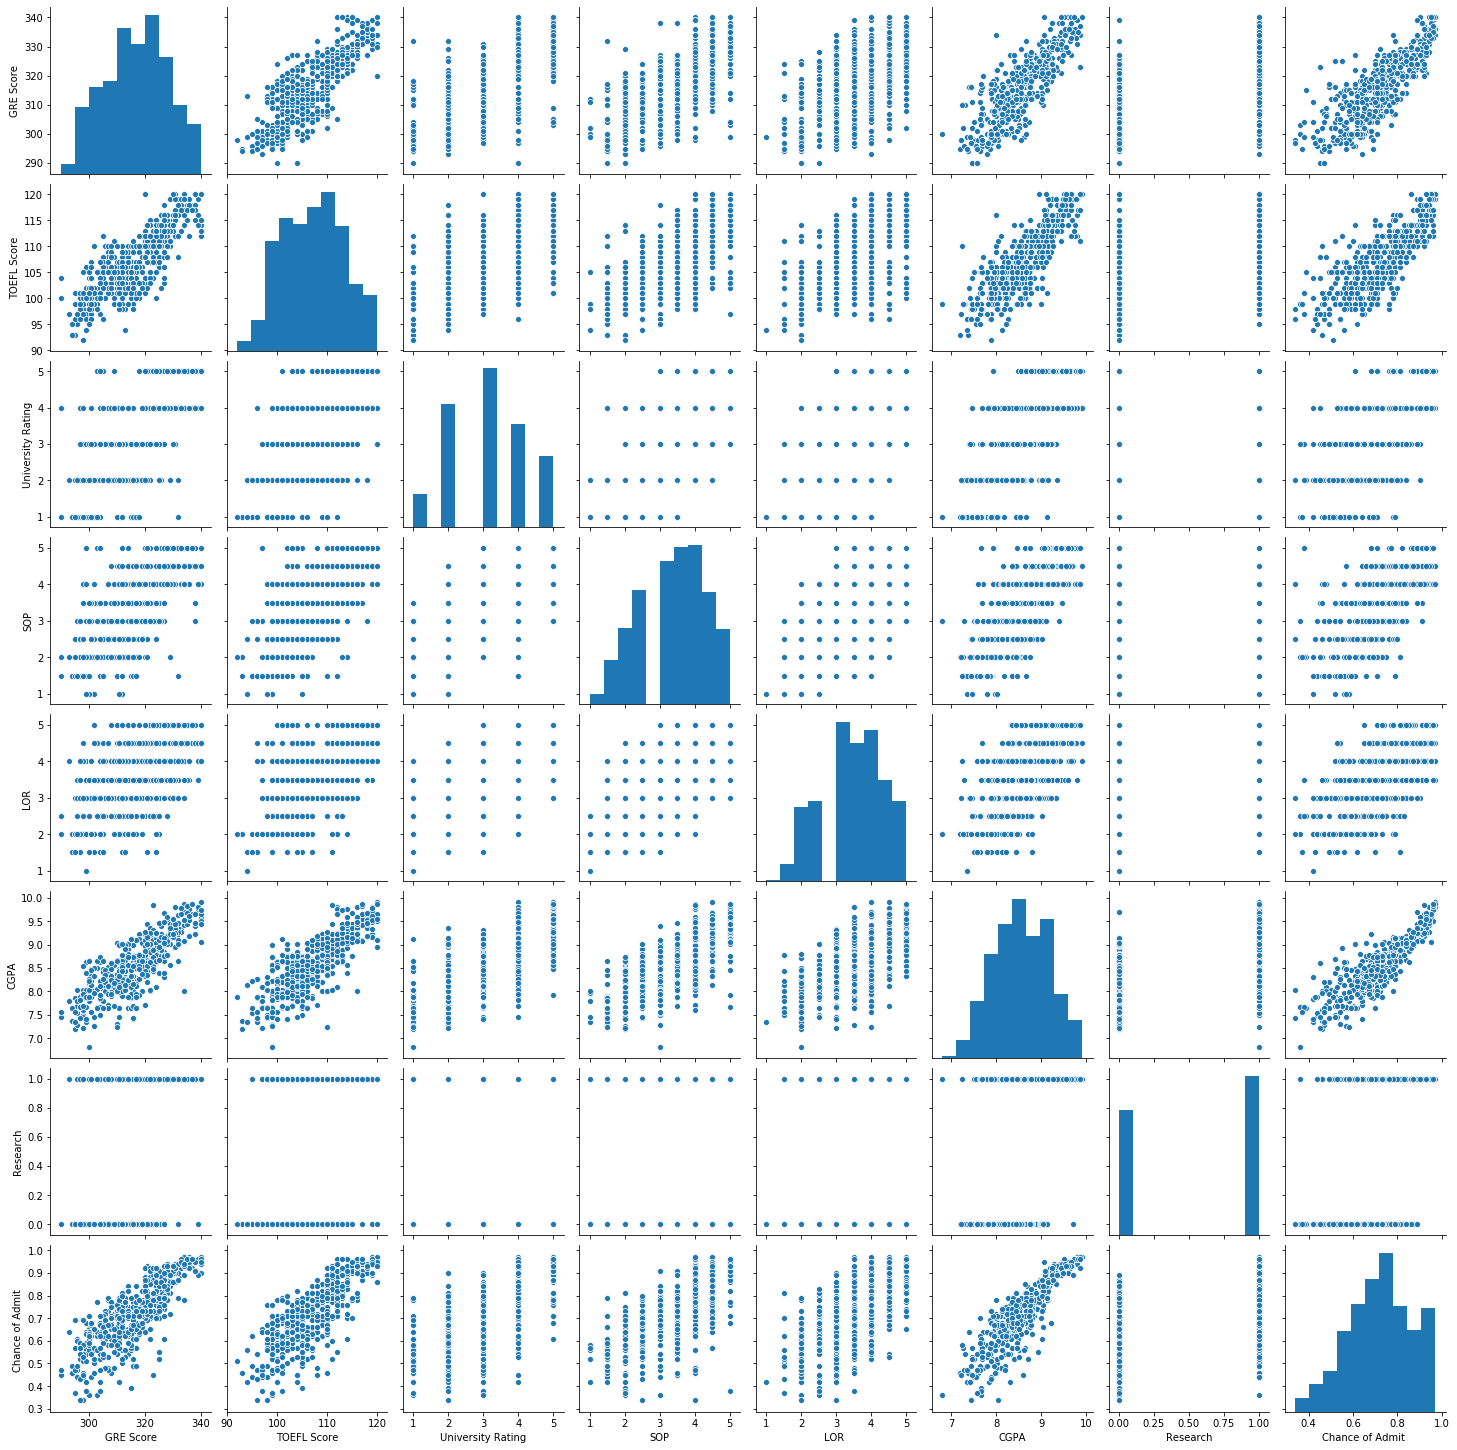

In [20]:
sns.pairplot(admission)

**From the pairplot above, it is clearly observed that mostly correlated with Chance of Admit is GRE Score, TOFL Score, CGPA**

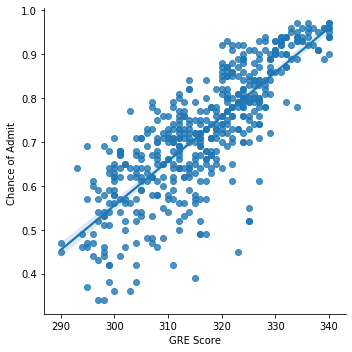

In [21]:
sns.lmplot(x='GRE Score', y='Chance of Admit ', data=admission)

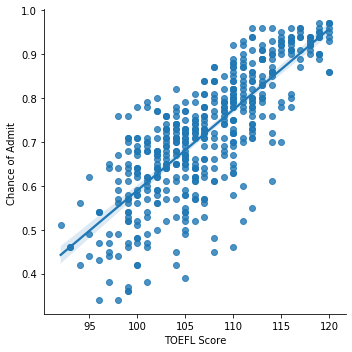

In [22]:
sns.lmplot(x='TOEFL Score', y='Chance of Admit ', data=admission)

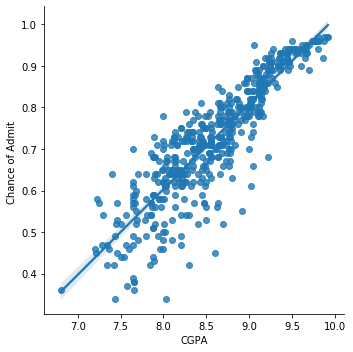

In [23]:
sns.lmplot(x='CGPA', y='Chance of Admit ', data=admission)

**Let's plot a categorical plot which tells how much doing a research increased the chance of admit of a person**

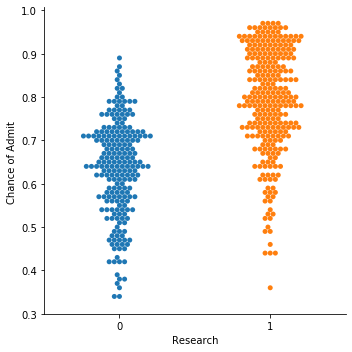

In [24]:
sns.catplot(x="Research", y="Chance of Admit ", kind="swarm", data=admission);

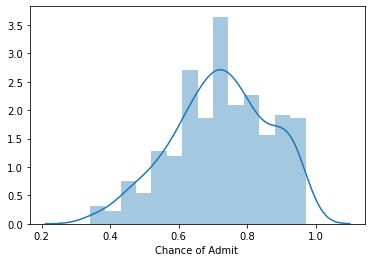

In [25]:
sns.distplot(admission['Chance of Admit '])

**Training a linear regression model**

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Chance of Admit .

In [36]:
from sklearn.model_selection import train_test_split

X = admission[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y = admission['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

**Training our model**

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.coef_

array([ 0.00173741,  0.00291958,  0.00571666, -0.00330517,  0.02235313,
        0.11893945,  0.02452511])

**Predicting Test Data**

In [42]:
predictions = lm.predict(X_test)

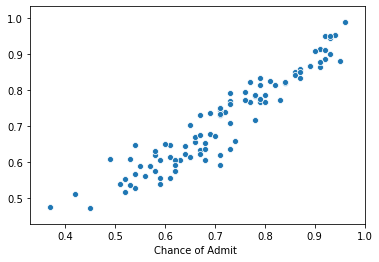

In [43]:
sns.scatterplot(y_test, predictions)

**Evaluating the Model**

In [44]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.03390995704418331
0.001843174437604738
0.0429322074625186


**Residuals**



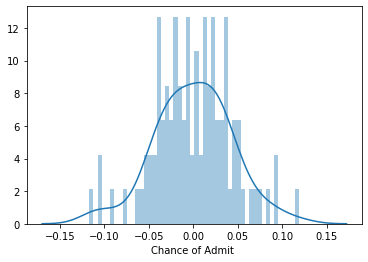

In [45]:
sns.distplot((y_test-predictions), bins=50)

**Conclusion**

In [47]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
coeff_df

,Coeff
GRE Score,0.001737
TOEFL Score,0.002920
University Rating,0.005717
SOP,-0.003305
LOR,0.022353
CGPA,0.118939
Research,0.024525


From the above observation, it is very clear that CGPA followed by TOEFL Score would increase the chance of getting an admission